In [18]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2024-05-22
# @Filename: 240522_PointInfo.ipynb

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import glob
import os

import pandas as pd
import h5py
import illustris_python as il


In [19]:
seondeok_snapshot_file_path = glob.glob(f"../../tng/tng_99_240425/tng_local/snapshot-99.*.hdf5")

In [20]:
len_dt = len(seondeok_snapshot_file_path)
ID_df = []; len_df = []
x_min = []; x_max = []
y_min = []; y_max = []
z_min = []; z_max = []

In [21]:
for num in range(50, 100):
    #print(num)
    ID_df.append(num)
    
    file = f"../../tng/tng_99_240425/tng_local/snapshot-99.{num}.hdf5"
    f = h5py.File(file, 'r')
    PartType1 = f['PartType1']
    dm_pos = PartType1["Coordinates"][:]
    dm_pos = dm_pos*0.001 # kpc -> Mpc 단위 변경
    dm_pos = dm_pos.astype(np.int32) # 데이터 타입 변경
    
    len_df.append(len(dm_pos))
    x = dm_pos[:, 0]
    x_min.append(min(x))
    x_max.append(max(x))
    
    y = dm_pos[:, 1]
    y_min.append(min(y))
    y_max.append(max(y))
    
    z = dm_pos[:, 2]    
    z_min.append(min(z))
    z_max.append(max(z))


In [22]:
dm_df = pd.DataFrame({"ID":ID_df, "x_min [cMpc/h]":x_min, "x_max [cMpc/h]":x_max, "y_min [cMpc/h]":y_min, "y_max [cMpc/h]":y_max, "z_min [cMpc/h]":z_min, "z_max [cMpc/h]":z_max, "len": len_df})
dm_df

,ID,x_min [cMpc/h],x_max [cMpc/h],y_min [cMpc/h],y_max [cMpc/h],z_min [cMpc/h],z_max [cMpc/h],len
0,50,13,180,0,204,32,184,26072180
1,51,2,193,5,197,8,195,26012929
2,52,7,188,6,192,9,194,25876345
3,53,2,203,0,204,22,194,25855663
4,54,4,190,5,197,1,196,26262285
5,55,4,189,21,194,4,203,26129307
6,56,2,203,10,191,12,200,26183949
7,57,0,204,17,201,0,178,26025357
8,58,0,202,1,196,6,193,26001911
9,59,7,202,1,202,4,186,26264100


Text(0, 0.5, 'value [cMpc/h]')

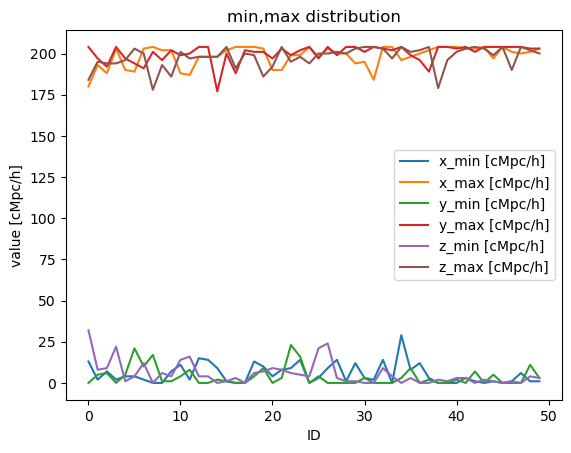

In [23]:
ax = dm_df.plot(y=["x_min [cMpc/h]", "x_max [cMpc/h]", "y_min [cMpc/h]", "y_max [cMpc/h]", "z_min [cMpc/h]", "z_max [cMpc/h]"], title='min,max distribution')
ax.set_xlabel('ID')
ax.set_ylabel('value [cMpc/h]')

In [24]:
# dm_df.to_csv('snapshot9_PointInfo.txt', sep = '\t', index=False)

In [25]:
from tabulate import tabulate

# tabulate 패키지를 사용하여 테이블 형식으로 변환
table = tabulate(dm_df.values, headers=dm_df.columns, tablefmt='plain', )

# 텍스트 파일로 저장
with open('snapshot9_PointInfo_aligned_50_100.txt', 'w') as f:
    f.write(table)